In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]

## General Object detection and/or segmentation (mask) using pretrained model of TorchVision

In [25]:
import torchvision
import torch

## comment one of these models

# mask model
# model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# without mask model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=False)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

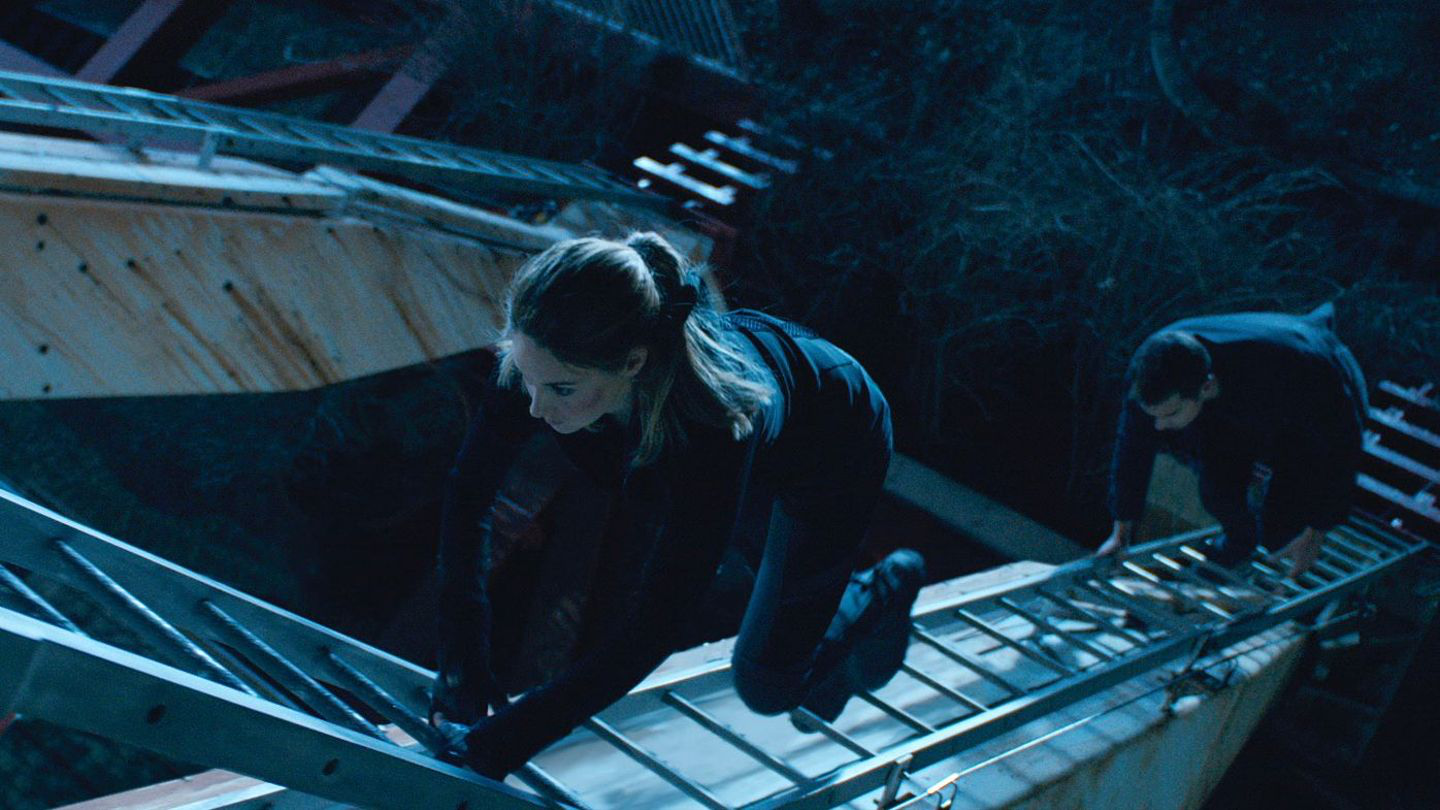

In [21]:
from PIL import Image
#img = Image.open('PennFudanPed/PNGImages/FudanPed00001.png')
#img = Image.open('1495723812-threepio luke and ben star wars-0000.jpg')
img = Image.open('mgid_ao_image_mtv.jpg')

img

In [22]:
from torchvision import transforms
trans = transforms.Compose([transforms.ToTensor()])
img_tensor = trans(img)
img_tensor.shape

torch.Size([3, 810, 1440])

In [23]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
COCO_INSTANCE_CATEGORY_NAMES[17]

'cat'

In [26]:
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img_tensor.to(device)])
prediction

[{'boxes': tensor([[ 456.3640,  230.5112,  915.6478,  784.3555],
          [1097.7400,  311.7508, 1370.8130,  566.9592],
          [1099.1123,  320.7165, 1336.2178,  567.7616],
          [ 426.3516,  241.1662,  708.3837,  753.3867],
          [ 516.8384,  522.0984, 1404.2775,  803.8708],
          [1102.3861,  306.5350, 1390.9333,  577.8829],
          [   4.3866,   36.5429,  961.1836,  654.7632],
          [1094.1780,  303.2720, 1372.3580,  566.7731],
          [ 412.3131,  293.1709,  564.8072,  738.1544],
          [ 728.4183,  463.0037,  923.6083,  733.9420],
          [   0.0000,  172.2901, 1003.7149,  792.1120],
          [  25.4641,   47.9766,  946.4999,  497.3376],
          [ 385.7642,  493.0679, 1440.0000,  806.8897],
          [  10.3773,   28.1799, 1086.0272,  541.4935],
          [   0.0000,  122.2282,  955.3077,  785.6149],
          [  17.3515,  175.2451,  942.0926,  783.5493],
          [   0.0000,  464.8125, 1213.5973,  809.9999],
          [ 509.0182,  444.0423,  931.8

In [32]:
labels = prediction[0]['labels']
scores = prediction[0]['scores']
boxes = prediction[0]['boxes']

In [8]:
def filter_objects(labels, scores, mapping_list=COCO_INSTANCE_CATEGORY_NAMES, alpha=0.9):
    for label, score in zip(labels, scores):
        if score>=alpha:
            print(score, mapping_list[label])
            
filter_objects(labels, scores, alpha=0.7)

tensor(0.9845) person
tensor(0.8316) dog
tensor(0.7142) person


## Just for Mask Models

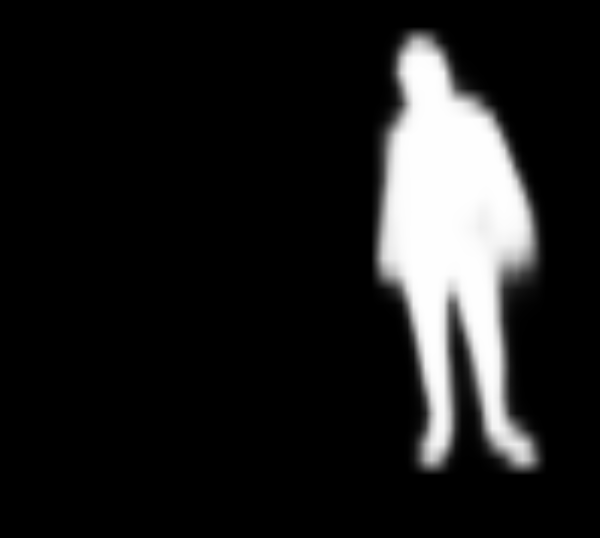

In [17]:
from torchvision import transforms

trans = transforms.Compose([transforms.ToPILImage()])

mask = prediction[0]['masks'][0]

mask = trans(mask)
mask

## Plot box with label and score

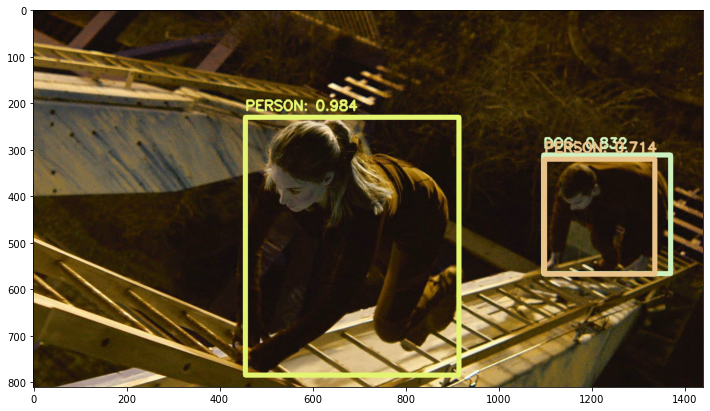

In [55]:
def filter_objects(np_img, labels, scores, boxes, mapping_list=COCO_INSTANCE_CATEGORY_NAMES, alpha=0.9):
    opencvImage = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    
    for label, score, box in zip(labels, scores, boxes):
        if score>=alpha:
            class_name = mapping_list[label].upper()
            score = round(score.item(), 3)
            color = (np.random.randint(100, 256),np.random.randint(100, 256),np.random.randint(100, 256))
            
            opencvImage = cv2.rectangle(opencvImage, (box[0], box[1]), (box[2], box[3]), color, 10)
            opencvImage = cv2.putText(opencvImage, f'{class_name}: {score}', (box[0], box[1]-15), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 4)
            
    return opencvImage

pil_image = Image.open('mgid_ao_image_mtv.jpg')
np_image = np.array(pil_image)

image_ = filter_objects(np_image, labels, scores, boxes, mapping_list=COCO_INSTANCE_CATEGORY_NAMES, alpha=0.7)
plt.imshow(image_)

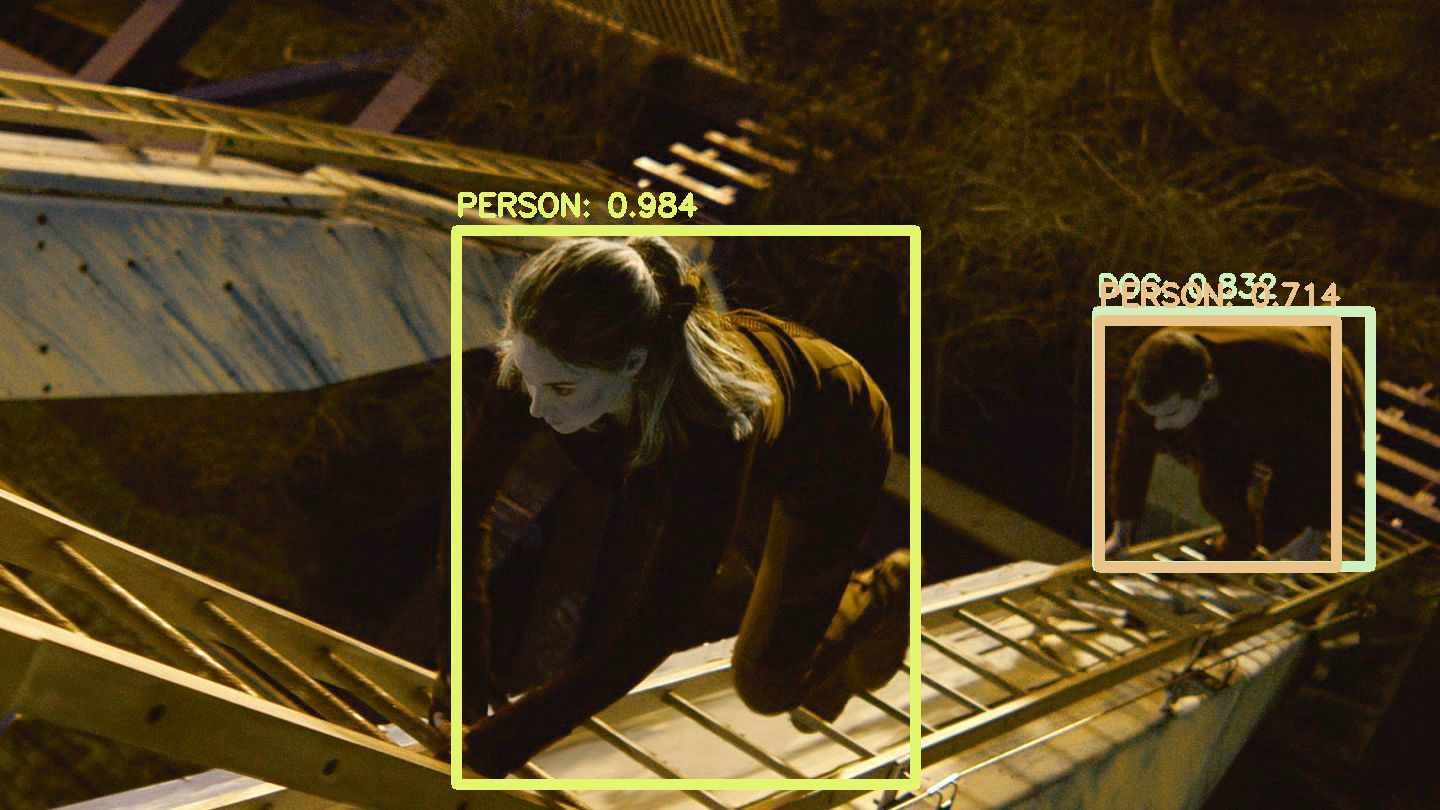

In [60]:
tra = transforms.Compose([transforms.ToPILImage()])
tra(image_)